# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """
    Build your own model
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

## LEARNING_RATE = 0.01

In [7]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = 1e-2
EPOCHS = 50
BATCH_SIZE = 256

OPTIMIZERS = ['SGD', 'RMSprop', 'AdaGrad', 'Adam']

In [8]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

for opt in OPTIMIZERS:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Optimizers",  opt)
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    print("Current Optimizers = ", opt)
    if opt == 'SGD':
        sgd_optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, decay=1e-6, nesterov=True, momentum=0.9)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer = sgd_optimizer)
    elif opt == "RMSprop":
        rmsprop_optimizer = keras.optimizers.RMSprop(lr=LEARNING_RATE, rho=0.9, epsilon=None, decay=0.0)
        model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = rmsprop_optimizer)  
    elif opt == "AdaGrad":
        adagrad_optimizer = keras.optimizers.Adagrad(lr=LEARNING_RATE, epsilon=None, decay=0.0)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer = adagrad_optimizer)
    else:
        adam_optimizer = keras.optimizers.Adam(lr=LEARNING_RATE, epsilon=None, decay=0.0)
        model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = adam_optimizer)
        
    model.fit(x_train, y_train, 
            epochs=EPOCHS, 
            batch_size=BATCH_SIZE, 
            validation_data=(x_test, y_test), 
            shuffle=True)
        
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "optimizers-%s" % str(opt)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Optimizers SGD
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Current Optimizers =  SGD
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 6s 124us/step - loss: 14.4468 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 6s 123us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 7s 132us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 6s 118us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 6s 114us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 6s 115us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 6s 116us/step - loss: 14.5063 - acc: 0.1000 - val_lo

50000/50000 [==============================] - 6s 125us/step - loss: 14.4456 - acc: 0.0995 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 6s 115us/step - loss: 14.5061 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 6s 116us/step - loss: 14.4864 - acc: 0.1005 - val_loss: 14.5059 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 6s 117us/step - loss: 14.4848 - acc: 0.1001 - val_loss: 14.5055 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 6s 125us/step - loss: 10.8594 - acc: 0.1232 - val_loss: 2.1414 - val_acc: 0.2008
Epoch 6/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.9528 - acc: 0.2905 - val_loss: 1.8639 - val_acc: 0.3271
Epoch 7/50
50000/50000 [==============================] - 6s 117us/step - loss: 1.8041 - acc: 0.3494 - val_loss: 1.7802 - val_acc: 0.3621
Epoch 8/50
50000/50000 [============

50000/50000 [==============================] - 3s 61us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 3s 62us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 3s 59us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 3s 58us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 3s 58us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 3s 58us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============================] - 3s 59us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 9/50
50000/50000 [==============

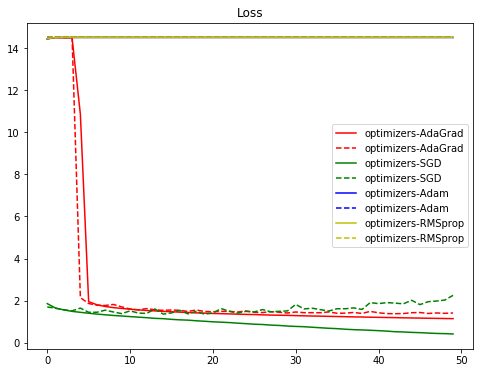

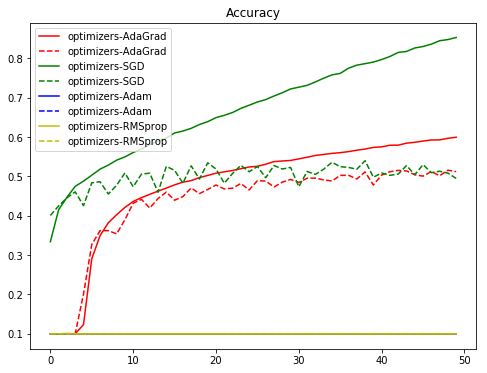

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

## LEARNING_RATE = 0.001

In [10]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256

OPTIMIZERS = ['SGD', 'RMSprop', 'AdaGrad', 'Adam']

In [11]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

for opt in OPTIMIZERS:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Optimizers",  opt)
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    print("Current Optimizers = ", opt)
    if opt == 'SGD':
        sgd_optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, decay=1e-6, nesterov=True, momentum=0.9)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer = sgd_optimizer)
    elif opt == "RMSprop":
        rmsprop_optimizer = keras.optimizers.RMSprop(lr=LEARNING_RATE, rho=0.9, epsilon=None, decay=0.0)
        model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = rmsprop_optimizer)  
    elif opt == "AdaGrad":
        adagrad_optimizer = keras.optimizers.Adagrad(lr=LEARNING_RATE, epsilon=None, decay=0.0)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer = adagrad_optimizer)
    else:
        adam_optimizer = keras.optimizers.Adam(lr=LEARNING_RATE, epsilon=None, decay=0.0)
        model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = adam_optimizer)
        
    model.fit(x_train, y_train, 
            epochs=EPOCHS, 
            batch_size=BATCH_SIZE, 
            validation_data=(x_test, y_test), 
            shuffle=True)
        
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "optimizers-%s" % str(opt)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Optimizers SGD
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Current Optimizers =  SGD
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=

50000/50000 [==============================] - 3s 59us/step - loss: 2.2763 - acc: 0.2086 - val_loss: 2.0803 - val_acc: 0.2390
Epoch 2/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.8941 - acc: 0.3151 - val_loss: 2.1006 - val_acc: 0.2562
Epoch 3/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.7880 - acc: 0.3564 - val_loss: 1.7558 - val_acc: 0.3709
Epoch 4/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.7103 - acc: 0.3883 - val_loss: 1.8002 - val_acc: 0.3620
Epoch 5/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.6552 - acc: 0.4074 - val_loss: 1.6396 - val_acc: 0.4237
Epoch 6/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.6135 - acc: 0.4245 - val_loss: 1.6753 - val_acc: 0.3934
Epoch 7/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.5740 - acc: 0.4374 - val_loss: 1.6182 - val_acc: 0.4232
Epoch 8/50
50000/50000 [============================

50000/50000 [==============================] - 3s 55us/step - loss: 1.8130 - acc: 0.3589 - val_loss: 1.7660 - val_acc: 0.3785
Epoch 3/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.7375 - acc: 0.3879 - val_loss: 1.7201 - val_acc: 0.3928
Epoch 4/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.6832 - acc: 0.4067 - val_loss: 1.8120 - val_acc: 0.3519
Epoch 5/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.6440 - acc: 0.4213 - val_loss: 1.6715 - val_acc: 0.4011
Epoch 6/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.6094 - acc: 0.4356 - val_loss: 1.6462 - val_acc: 0.4035
Epoch 7/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.5842 - acc: 0.4447 - val_loss: 1.6032 - val_acc: 0.4412
Epoch 8/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.5651 - acc: 0.4516 - val_loss: 1.5709 - val_acc: 0.4430
Epoch 9/50
50000/50000 [============================

50000/50000 [==============================] - 3s 58us/step - loss: 1.6073 - acc: 0.4256 - val_loss: 1.5867 - val_acc: 0.4441
Epoch 4/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.5466 - acc: 0.4486 - val_loss: 1.5953 - val_acc: 0.4421
Epoch 5/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.5019 - acc: 0.4671 - val_loss: 1.4877 - val_acc: 0.4732
Epoch 6/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.4520 - acc: 0.4818 - val_loss: 1.5005 - val_acc: 0.4675
Epoch 7/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.4329 - acc: 0.4890 - val_loss: 1.4498 - val_acc: 0.4839
Epoch 8/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.4016 - acc: 0.4989 - val_loss: 1.4828 - val_acc: 0.4666
Epoch 9/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.3682 - acc: 0.5118 - val_loss: 1.4991 - val_acc: 0.4768
Epoch 10/50
50000/50000 [===========================

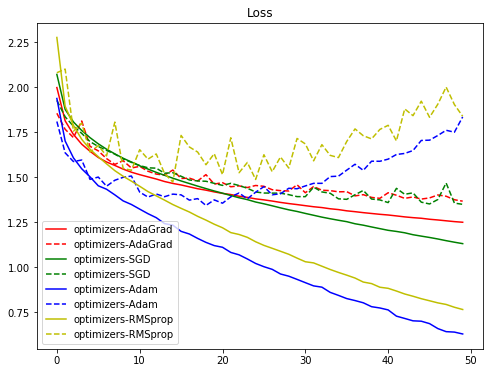

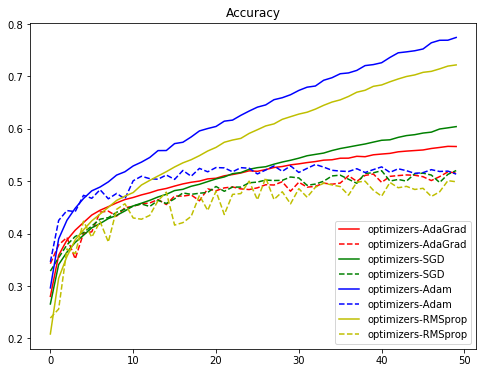

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()